In [51]:
import pandas as pd

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [52]:
data = pd.read_csv('../data/student-por.csv')

In [53]:
# This cell is used to convert the categorical data to numerical data, and write it back to the csv file
# Thus, It only has to be run once
# from sklearn.preprocessing import LabelEncoder

# stander_scaler = LabelEncoder()
# data['sex'] = stander_scaler.fit_transform(data['sex'])
# data['school'] = stander_scaler.fit_transform(data['school'])
# data['address'] = stander_scaler.fit_transform(data['address'])
# data['famsize'] = stander_scaler.fit_transform(data['famsize'])
# data['Pstatus'] = stander_scaler.fit_transform(data['Pstatus'])
# data['Mjob'] = stander_scaler.fit_transform(data['Mjob'])
# data['Fjob'] = stander_scaler.fit_transform(data['Fjob'])
# data['reason'] = stander_scaler.fit_transform(data['reason'])
# data['guardian'] = stander_scaler.fit_transform(data['guardian'])
# data['schoolsup'] = stander_scaler.fit_transform(data['schoolsup'])
# data['famsup'] = stander_scaler.fit_transform(data['famsup'])
# data['paid'] = stander_scaler.fit_transform(data['paid'])
# data['activities'] = stander_scaler.fit_transform(data['activities'])
# data['nursery'] = stander_scaler.fit_transform(data['nursery'])
# data['higher'] = stander_scaler.fit_transform(data['higher'])
# data['internet'] = stander_scaler.fit_transform(data['internet'])
# data['romantic'] = stander_scaler.fit_transform(data['romantic'])

# write it back to the csv file
# data.to_csv('../data/student-por.csv', index=False)

In [54]:
Y = data[['G1', 'G2', 'G3']].sum(axis=1)
X = data.drop(['G1', 'G2', 'G3'], axis=1)
Y = Y.apply(lambda x: 1 if x > 36 else 0)

In [55]:
print(X.head())
print(Y.head())

   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  health  \
0       1         0         0       4         3      4     1     1       3   
1       1         1         0       5         3      3     1     1       3   
2       1         1         0       4         3      2     2     3       3   
3       1         1         1       3         2      2     1     1       5   
4       1         0         0       4         3      2     1     2       5   

   absences  
0         4  
1         2  
2         6  


In [56]:
# prints out the number of 0s and 1s in each grade classification 
print(Y.value_counts())

0    373
1    276
Name: count, dtype: int64


In [57]:
data.std()

school        0.476776
sex           0.492187
age           1.218138
address       0.460143
famsize       0.456771
Pstatus       0.328996
Medu          1.134552
Fedu          1.099931
Mjob          1.248317
Fjob          0.863487
reason        1.192045
guardian      0.519187
traveltime    0.748660
studytime     0.829510
failures      0.593235
schoolsup     0.306502
famsup        0.487381
paid          0.237841
activities    0.500171
nursery       0.398212
higher        0.308481
internet      0.422857
romantic      0.482704
famrel        0.955717
freetime      1.051093
goout         1.175766
Dalc          0.924834
Walc          1.284380
health        1.446259
absences      4.640759
G1            2.745265
G2            2.913639
G3            3.230656
dtype: float64

In [58]:
corr = X.corrwith(Y)
print(corr)

school       -0.216612
sex          -0.121178
age          -0.111140
address       0.154401
famsize       0.029692
Pstatus      -0.018757
Medu          0.250064
Fedu          0.210895
Mjob          0.152817
Fjob          0.079145
reason        0.122862
guardian     -0.080321
traveltime   -0.178832
studytime     0.196043
failures     -0.295689
schoolsup    -0.050051
famsup        0.004753
paid         -0.073249
activities    0.068846
nursery       0.066065
higher        0.276473
internet      0.126987
romantic     -0.081672
famrel        0.075510
freetime     -0.073464
goout        -0.084976
Dalc         -0.214624
Walc         -0.178247
health       -0.131542
absences     -0.149890
dtype: float64


In [66]:
from datetime import datetime

# Define the logistic regression model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),  # Input layer for 30 features
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
log_data = []
best_report= None
curr_best_model = None
best_f1 = 0
for i in range(1, 99):
    print(f"iter:{i}")
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i / 100, random_state=42)

    # Normalize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

    y_pred = model.predict(X_test_scaled)
    y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]

    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)


    if f1 > best_f1 and 80 > i > 20 :
        best_f1 = f1
        curr_best_model = model
        best_report = classification_report(y_test, y_pred)
    log_data.append({'Iteration': i, 'F1 Score': f1, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})



iter:1
1/1 [==============================] - 0s 28ms/step
iter:2
1/1 [==============================] - 0s 13ms/step
iter:3
1/1 [==============================] - 0s 15ms/step
iter:4
1/1 [==============================] - 0s 15ms/step
iter:5
2/2 [==============================] - 0s 2ms/step
iter:6
2/2 [==============================] - 0s 2ms/step
iter:7
2/2 [==============================] - 0s 2ms/step
iter:8
2/2 [==============================] - 0s 2ms/step
iter:9
2/2 [==============================] - 0s 2ms/step
iter:10
3/3 [==============================] - 0s 1ms/step
iter:11
3/3 [==============================] - 0s 1ms/step
iter:12
3/3 [==============================] - 0s 1ms/step
iter:13
3/3 [==============================] - 0s 1ms/step
iter:14
3/3 [==============================] - 0s 1ms/step
iter:15
4/4 [==============================] - 0s 1ms/step
iter:16
4/4 [==============================] - 0s 866us/step
iter:17
4/4 [==============================] - 0s 854us/ste

In [67]:
log_df = pd.DataFrame(log_data)
print(best_report)
curr_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
log_df.to_csv(f"logistic_regression_{curr_time}.csv", index=False)

              precision    recall  f1-score   support

           0       0.74      0.68      0.71       136
           1       0.64      0.71      0.68       111

    accuracy                           0.69       247
   macro avg       0.69      0.69      0.69       247
weighted avg       0.70      0.69      0.69       247


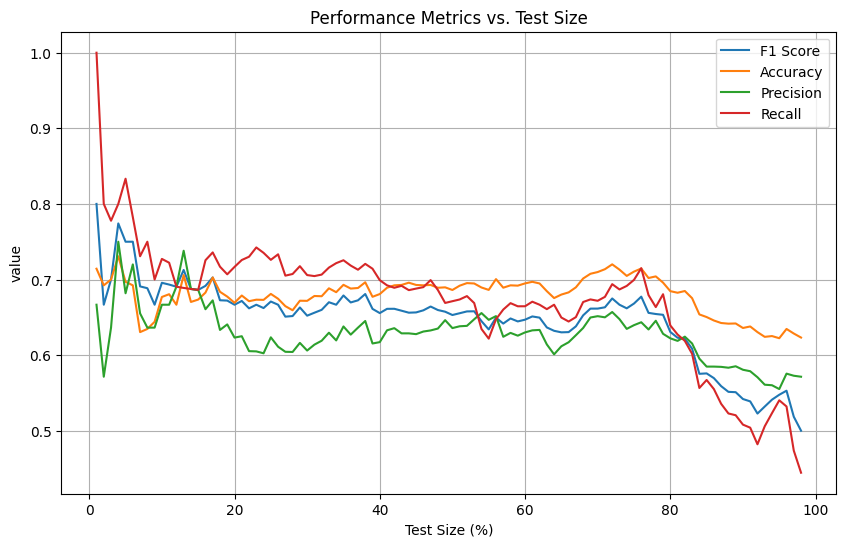

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(log_df['Iteration'], log_df['F1 Score'], label='F1 Score')
plt.plot(log_df['Iteration'], log_df['Accuracy'], label='Accuracy')
plt.plot(log_df['Iteration'], log_df['Precision'], label='Precision')
plt.plot(log_df['Iteration'], log_df['Recall'], label='Recall')

plt.xlabel('Test Size (%)')
plt.ylabel('value')
plt.title('Performance Metrics vs. Test Size')
plt.legend()
plt.grid(True)
plt.show()